In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [2]:
import os
print(os.getcwd())


C:\Users\aryak\anaconda_projects\8ddcf9fb-7bb1-4458-ae47-000d53611373


In [3]:
mnist_train = pd.read_csv("datasets/mnist/train.csv")
mnist_test = pd.read_csv("datasets/mnist/test.csv")

mnist_train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


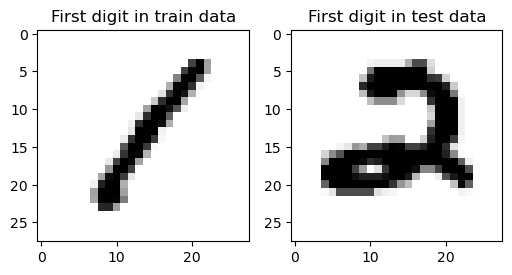

In [4]:
# Convert the first row (excluding the label) into a 28x28 image
train_data_digit1 = np.asarray(mnist_train.iloc[0:1, 1:]).reshape(28, 28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1, ]).reshape(28, 28)

# Display both train and test digits side by side
plt.figure(figsize=(6,3))  # Optional: makes the image a bit larger
plt.subplot(1, 2, 1)
plt.imshow(train_data_digit1, cmap=plt.cm.gray_r)
plt.title("First digit in train data")

plt.subplot(1, 2, 2)
plt.imshow(test_data_digit1, cmap=plt.cm.gray_r)
plt.title("First digit in test data")
plt.show()


In [5]:
# Split training data into features (X) and labels (Y)
X_train = mnist_train.iloc[:, 1:]   # All pixel values (columns 1 to end)
Y_train = mnist_train.iloc[:, 0]    # Only the label column (column 0)


In [6]:
from sklearn.neural_network import MLPClassifier

# Create the neural network model
# (50 neurons in one hidden layer)
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=1)

# Train the model using training data
nn_model.fit(X_train, Y_train)


C:\Users\aryak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=1)

In [7]:
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=1)
nn_model.fit(X_train, Y_train)


MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=1)

In [8]:
# Predict the digit shown in the first row of test data
prediction = nn_model.predict(mnist_test.iloc[0:1,])
print("Predicted digit:", prediction[0])


Predicted digit: 2


In [9]:
# Predict on all training data
predicted_digits = nn_model.predict(X_train)

# Evaluate the model's performance
from sklearn.metrics import classification_report
print(classification_report(Y_train, predicted_digits))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4132
           1       1.00      1.00      1.00      4684
           2       0.99      0.99      0.99      4177
           3       0.99      0.98      0.99      4351
           4       1.00      0.99      0.99      4072
           5       0.99      0.99      0.99      3795
           6       0.99      1.00      1.00      4137
           7       1.00      0.99      0.99      4401
           8       0.95      1.00      0.97      4063
           9       0.99      0.98      0.99      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000

